# **Mouniting Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Impoting Libraries


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

## **Data PreProcessing**

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Spliting the Data**


In [4]:
import splitfolders
splitfolders.ratio("../content/gdrive/My Drive/brain_tumor_dataset", output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 265 files [00:04, 60.59 files/s]


In [5]:
train_path="/content/output/train"
val_path="/content/output/val"
test_path="/content/output/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)


In [6]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 212 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


**Show Images**


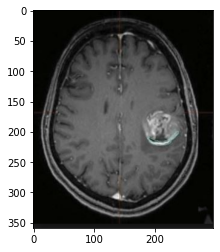

In [7]:
from cv2 import imread
yes_path = train_path+"/yes/"+os.listdir(train_path+"/yes/")[6]

tumour = imread(yes_path)



tumour = imread(yes_path)

plt.imshow(tumour)


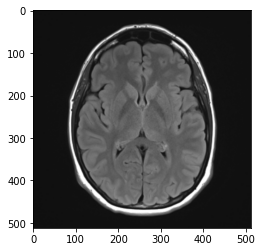

In [8]:
no_path = train_path+"/no/"+os.listdir(train_path+"/no/")[9]

No_tumour = imread(no_path)

plt.imshow(No_tumour)


# ** Importing The Model VGG19 **

In [9]:
from tensorflow.keras.applications import  VGG19

model = VGG19(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

80150528/80134624 [==============================] - 1s 0us/step


Making Training on layer false

In [10]:
for layers in model.layers:
    layers.trainable = False

Final Toucing on Model


In [ ]:
from keras.layers import  Dropout
x = Flatten()(model.output)
#x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

modelVGG = keras.Model(model.input, x)
modelVGG.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
modelVGG.summary()

In [12]:
History = modelVGG.fit_generator(train_generator,validation_data = test_generator, epochs = 60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
7/7 [==============================] - 21s 1s/step - loss: 4.4480 - accuracy: 0.5896 - val_loss: 2.6988 - val_accuracy: 0.7037
Epoch 2/60
7/7 [==============================] - 4s 495ms/step - loss: 1.8775 - accuracy: 0.7877 - val_loss: 3.9466 - val_accuracy: 0.7037
Epoch 3/60
7/7 [==============================] - 4s 533ms/step - loss: 1.3342 - accuracy: 0.8538 - val_loss: 3.9828 - val_accuracy: 0.7037
Epoch 4/60
7/7 [==============================] - 4s 503ms/step - loss: 1.2060 - accuracy: 0.8821 - val_loss: 3.7799 - val_accuracy: 0.7407
Epoch 5/60
7/7 [==============================] - 4s 499ms/step - loss: 1.2900 - accuracy: 0.8632 - val_loss: 4.6047 - val_accuracy: 0.7778
Epoch 6/60
7/7 [==============================] - 4s 493ms/step - loss: 0.6853 - accuracy: 0.9245 - val_loss: 3.6019 - val_accuracy: 0.7778
Epoch 7/60
7/7 [==============================] - 3s 487ms/step - loss: 0.4420 - accuracy: 0.9623 - val_loss: 3.5537 - val_accuracy: 0.8148
Epoch 8/60
7/7 [======

Ploting Graph


In [13]:
hist = History.history


Text(0, 0.5, 'accuracy')

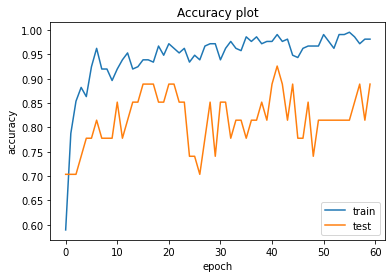

In [14]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

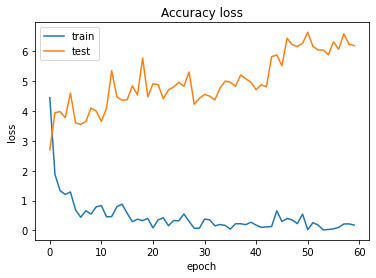

In [15]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [61]:
test_loss, test_acc = modelVGG.evaluate(val_generator, steps=len(val_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

1/1 [==============================] - 0s 334ms/step - loss: 2.4325 - accuracy: 0.9231
Loss: 243.250
Accuracy: 92.308


**ResNet50**

In [17]:
from tensorflow.keras.applications import  ResNet50

model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

94781440/94765736 [==============================] - 2s 0us/step


In [18]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
#x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

modelRN50 = keras.Model(model.input, x)
modelRN50.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
modelRN50.summary()

In [21]:
HistoryR = modelRN50.fit_generator(train_generator,validation_data = test_generator, epochs = 60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
7/7 [==============================] - 8s 691ms/step - loss: 2.7517 - accuracy: 0.6462 - val_loss: 2.5084 - val_accuracy: 0.7037
Epoch 2/60
7/7 [==============================] - 3s 500ms/step - loss: 1.8281 - accuracy: 0.7925 - val_loss: 1.2952 - val_accuracy: 0.8148
Epoch 3/60
7/7 [==============================] - 4s 567ms/step - loss: 1.2862 - accuracy: 0.8868 - val_loss: 2.1326 - val_accuracy: 0.6667
Epoch 4/60
7/7 [==============================] - 6s 870ms/step - loss: 0.7975 - accuracy: 0.8821 - val_loss: 1.0416 - val_accuracy: 0.8519
Epoch 5/60
7/7 [==============================] - 3s 448ms/step - loss: 0.7457 - accuracy: 0.9104 - val_loss: 1.4571 - val_accuracy: 0.7037
Epoch 6/60
7/7 [==============================] - 3s 438ms/step - loss: 0.4732 - accuracy: 0.8915 - val_loss: 2.7193 - val_accuracy: 0.7407
Epoch 7/60
7/7 [==============================] - 4s 533ms/step - loss: 0.4121 - accuracy: 0.9292 - val_loss: 1.7816 - val_accuracy: 0.8519
Epoch 8/60
7/7 [====

In [22]:
histR = HistoryR.history

Text(0, 0.5, 'accuracy')

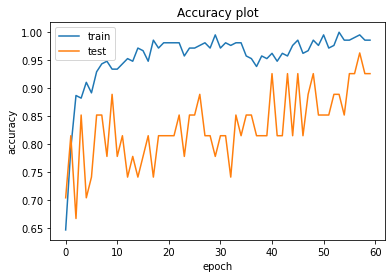

In [23]:

plt.plot(histR["accuracy"])
plt.plot(histR["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

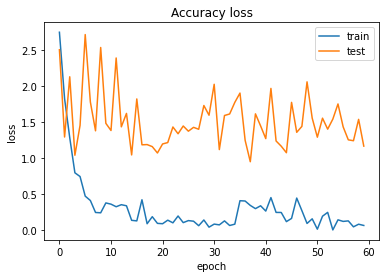

In [24]:
plt.plot(histR["loss"])
plt.plot(histR["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [63]:
test_loss, test_acc = modelRN50.evaluate(val_generator, steps=len(val_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

1/1 [==============================] - 0s 238ms/step - loss: 4.1577 - accuracy: 0.6154
Loss: 415.770
Accuracy: 61.538


# **ResNet101**

In [26]:
from tensorflow.keras.applications import  ResNet101

model = ResNet101(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

171458560/171446536 [==============================] - 2s 0us/step


In [27]:
for layers in model.layers:
    layers.trainable = False

In [ ]:
x = Flatten()(model.output)
#x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

modelRN101 = keras.Model(model.input, x)
modelRN101.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
modelRN101.summary()

# **Training the ResNet101**


In [29]:
History101 = modelRN101.fit_generator(train_generator,validation_data = test_generator, epochs = 60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
7/7 [==============================] - 10s 766ms/step - loss: 4.5837 - accuracy: 0.5943 - val_loss: 2.8363 - val_accuracy: 0.7037
Epoch 2/60
7/7 [==============================] - 3s 478ms/step - loss: 2.5555 - accuracy: 0.7689 - val_loss: 2.8287 - val_accuracy: 0.7778
Epoch 3/60
7/7 [==============================] - 3s 484ms/step - loss: 1.0347 - accuracy: 0.9104 - val_loss: 1.5601 - val_accuracy: 0.8519
Epoch 4/60
7/7 [==============================] - 3s 483ms/step - loss: 1.0951 - accuracy: 0.8821 - val_loss: 3.4303 - val_accuracy: 0.7778
Epoch 5/60
7/7 [==============================] - 3s 509ms/step - loss: 1.0614 - accuracy: 0.8915 - val_loss: 1.3279 - val_accuracy: 0.8148
Epoch 6/60
7/7 [==============================] - 3s 520ms/step - loss: 0.5087 - accuracy: 0.9151 - val_loss: 2.6770 - val_accuracy: 0.7778
Epoch 7/60
7/7 [==============================] - 3s 478ms/step - loss: 0.3421 - accuracy: 0.9434 - val_loss: 1.4839 - val_accuracy: 0.8148
Epoch 8/60
7/7 [===

In [30]:
hist101 = History101.history

Text(0, 0.5, 'accuracy')

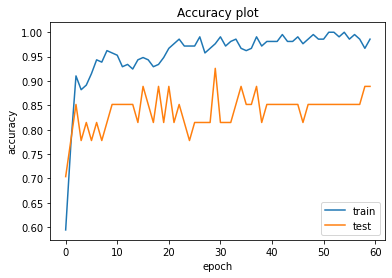

In [31]:
plt.plot(hist101["accuracy"])
plt.plot(hist101["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

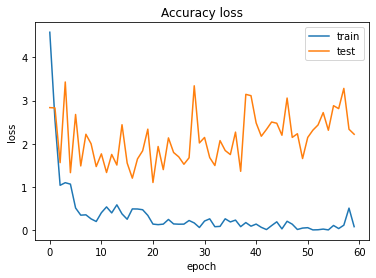

In [32]:
plt.plot(hist101["loss"])
plt.plot(hist101["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [64]:
test_loss, test_acc = modelRN101.evaluate(val_generator, steps=len(val_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

1/1 [==============================] - 0s 293ms/step - loss: 3.9512 - accuracy: 0.7692
Loss: 395.123
Accuracy: 76.923


**EfficientNetB7**

In [34]:
from tensorflow.keras.applications import  EfficientNetB7

model = EfficientNetB7(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

258088960/258076736 [==============================] - 1s 0us/step


In [35]:
for layers in model.layers:
    layers.trainable = False

In [36]:
x = Flatten()(model.output)
#x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

modelEN = keras.Model(model.input, x)
modelEN.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
#model.summary()

EfficentNetB7

In [37]:
HistoryB7 = modelEN.fit_generator(train_generator,validation_data = test_generator, epochs = 60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
7/7 [==============================] - 30s 2s/step - loss: 2.6517 - accuracy: 0.6132 - val_loss: 5.8661 - val_accuracy: 0.6667
Epoch 2/60
7/7 [==============================] - 4s 625ms/step - loss: 2.4243 - accuracy: 0.7170 - val_loss: 3.8507 - val_accuracy: 0.7037
Epoch 3/60
7/7 [==============================] - 4s 583ms/step - loss: 1.2636 - accuracy: 0.7877 - val_loss: 1.7273 - val_accuracy: 0.8148
Epoch 4/60
7/7 [==============================] - 4s 627ms/step - loss: 0.9090 - accuracy: 0.8585 - val_loss: 1.3702 - val_accuracy: 0.8148
Epoch 5/60
7/7 [==============================] - 4s 591ms/step - loss: 0.9341 - accuracy: 0.8443 - val_loss: 1.6337 - val_accuracy: 0.8519
Epoch 6/60
7/7 [==============================] - 4s 588ms/step - loss: 0.2931 - accuracy: 0.9245 - val_loss: 1.8223 - val_accuracy: 0.8148
Epoch 7/60
7/7 [==============================] - 4s 583ms/step - loss: 0.2520 - accuracy: 0.9387 - val_loss: 1.3812 - val_accuracy: 0.8889
Epoch 8/60
7/7 [======

In [38]:
histB7= HistoryB7.history

Text(0, 0.5, 'accuracy')

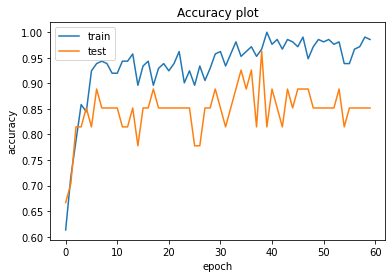

In [39]:
plt.plot(histB7["accuracy"])
plt.plot(histB7["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

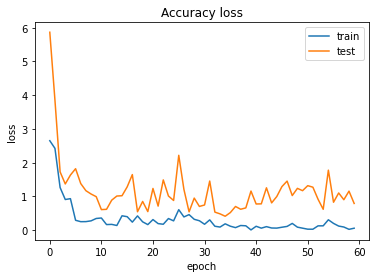

In [40]:
plt.plot(histB7["loss"])
plt.plot(histB7["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [65]:
test_loss, test_acc = modelEN.evaluate(val_generator, steps=len(val_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

1/1 [==============================] - 0s 471ms/step - loss: 2.6887 - accuracy: 0.8077
Loss: 268.868
Accuracy: 80.769


NasNet


In [43]:
train_datagen_NasNet = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen_NasNet = ImageDataGenerator()
val_datagen_NasNet = ImageDataGenerator()
train_generator_NasNet = train_datagen_NasNet.flow_from_directory(train_path,target_size=(331, 331),batch_size=32,shuffle=True,class_mode='binary')
test_generator_NasNet = test_datagen_NasNet.flow_from_directory(test_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')
val_generator_NasNet = val_datagen_NasNet.flow_from_directory(val_path,target_size=(331,331),batch_size=32,shuffle=False,class_mode='binary')

Found 212 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [44]:
from tensorflow.keras.applications import  NASNetLarge

model = NASNetLarge(
      input_shape = (331,331,3),
      include_top = False,
      weights = 'imagenet'
    )

343621632/343610240 [==============================] - 2s 0us/step


In [45]:
for layers in model.layers:
    layers.trainable = False

In [46]:
from keras.layers import  Dropout
x = Flatten()(model.output)
#x = Dropout(0.5)(x)
x = Dense(1, activation = "sigmoid")(x)

modelNN = keras.Model(model.input, x)
modelNN.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
#model.summary()

In [47]:
HistoryNas = modelNN.fit_generator(train_generator_NasNet,validation_data = test_generator_NasNet, epochs = 60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
7/7 [==============================] - 34s 2s/step - loss: 28.3524 - accuracy: 0.5142 - val_loss: 14.4529 - val_accuracy: 0.6296
Epoch 2/60
7/7 [==============================] - 9s 1s/step - loss: 13.0603 - accuracy: 0.5708 - val_loss: 6.4545 - val_accuracy: 0.6667
Epoch 3/60
7/7 [==============================] - 9s 1s/step - loss: 7.5746 - accuracy: 0.7358 - val_loss: 9.9256 - val_accuracy: 0.6296
Epoch 4/60
7/7 [==============================] - 9s 1s/step - loss: 6.9234 - accuracy: 0.6887 - val_loss: 6.6039 - val_accuracy: 0.7778
Epoch 5/60
7/7 [==============================] - 9s 1s/step - loss: 7.4595 - accuracy: 0.6887 - val_loss: 6.8081 - val_accuracy: 0.7407
Epoch 6/60
7/7 [==============================] - 9s 1s/step - loss: 5.8372 - accuracy: 0.6698 - val_loss: 3.8872 - val_accuracy: 0.6296
Epoch 7/60
7/7 [==============================] - 9s 1s/step - loss: 3.5859 - accuracy: 0.7264 - val_loss: 2.8753 - val_accuracy: 0.7037
Epoch 8/60
7/7 [=====================

In [48]:
histNas = HistoryNas.history

Text(0, 0.5, 'accuracy')

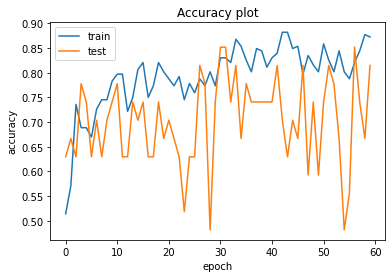

In [49]:
plt.plot(histNas["accuracy"])
plt.plot(histNas["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

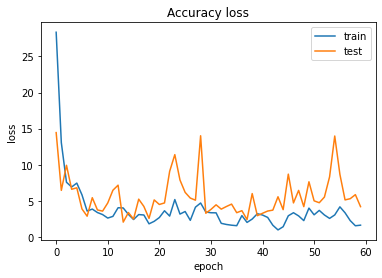

In [50]:
plt.plot(histNas["loss"])
plt.plot(histNas["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [67]:
test_loss, test_acc = modelNN.evaluate(val_generator_NasNet, steps=len(val_generator_NasNet), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0))

1/1 [==============================] - 2s 2s/step - loss: 5.7508 - accuracy: 0.6923
Loss: 575.083
Accuracy: 69.231


Plotting Graphs


Text(0, 0.5, 'accuracy')

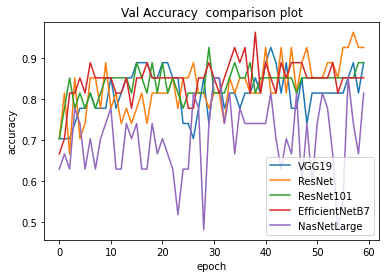

In [52]:
plt.plot(hist["val_accuracy"])
plt.plot(histR["val_accuracy"])
plt.plot(hist101["val_accuracy"])
plt.plot(histB7["val_accuracy"])
plt.plot(histNas["val_accuracy"])
plt.title("Val Accuracy  comparison plot")
plt.legend(["VGG19","ResNet","ResNet101","EfficientNetB7", "NasNetLarge"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

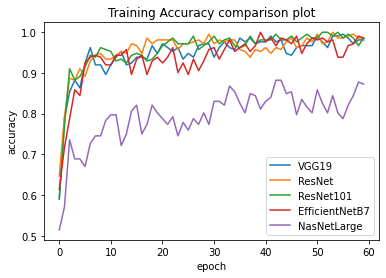

In [53]:
plt.plot(hist["accuracy"])
plt.plot(histR["accuracy"])
plt.plot(hist101["accuracy"])
plt.plot(histB7["accuracy"])
plt.plot(histNas["accuracy"])
plt.title("Training Accuracy comparison plot")
plt.legend(["VGG19","ResNet","ResNet101","EfficientNetB7", "NasNetLarge"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

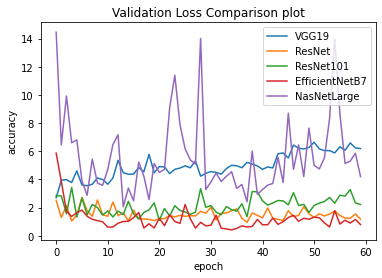

In [54]:
plt.plot(hist["val_loss"])
plt.plot(histR["val_loss"])
plt.plot(hist101["val_loss"])
plt.plot(histB7["val_loss"])
plt.plot(histNas["val_loss"])
plt.title("Validation Loss Comparison plot")
plt.legend(["VGG19","ResNet","ResNet101","EfficientNetB7", "NasNetLarge"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'accuracy')

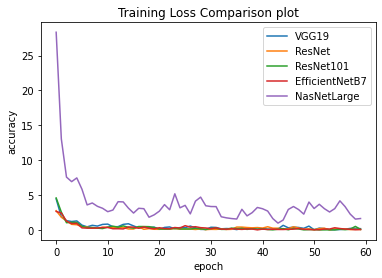

In [55]:
plt.plot(hist["loss"])
plt.plot(histR["loss"])
plt.plot(hist101["loss"])
plt.plot(histB7["loss"])
plt.plot(histNas["loss"])
plt.title("Training Loss Comparison plot")
plt.legend(["VGG19","ResNet","ResNet101","EfficientNetB7", "NasNetLarge"])
plt.xlabel("epoch")
plt.ylabel("accuracy")